In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)

In [14]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [15]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [35]:
def plot_sample(x,y,index):
  plt.figure(figsize=(20,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

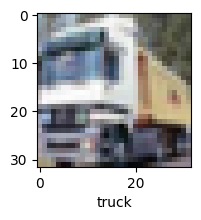

In [38]:
plot_sample(x_train,y_train,1)

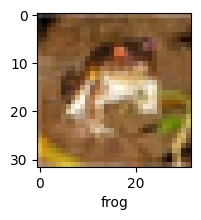

In [39]:
plot_sample(x_train,y_train,0)

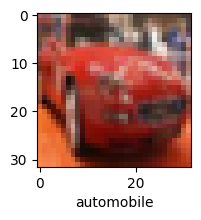

In [40]:
plot_sample(x_train,y_train,5)

In [41]:
x_train=x_train/255.0
x_test=x_test/255.0

In [42]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [44]:
annmodel=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [45]:

annmodel.compile(optimizer='SGD',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [49]:
annmodel.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2610 - accuracy: 0.5575
Epoch 2/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.2344 - accuracy: 0.5675
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2106 - accuracy: 0.5750
Epoch 4/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1858 - accuracy: 0.5851
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1636 - accuracy: 0.5910


In [52]:
cnnmodel=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [54]:
cnnmodel.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [55]:
history=cnnmodel.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4273 - accuracy: 0.4890 - val_loss: 1.2048 - val_accuracy: 0.5750
Epoch 2/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0960 - accuracy: 0.6181 - val_loss: 1.0710 - val_accuracy: 0.6321
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9696 - accuracy: 0.6606 - val_loss: 0.9752 - val_accuracy: 0.6634
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8821 - accuracy: 0.6943 - val_loss: 0.9300 - val_accuracy: 0.6779
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8157 - accuracy: 0.7150 - val_loss: 0.9174 - val_accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7505 - accuracy: 0.7392 - val_loss: 0.9245 - val_accuracy: 0.6833
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7035 - accuracy: 0.7556 - val_loss: 0.8975 -

In [57]:
cnnmodel.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9667 - accuracy: 0.6910


[0.9667240977287292, 0.6909999847412109]

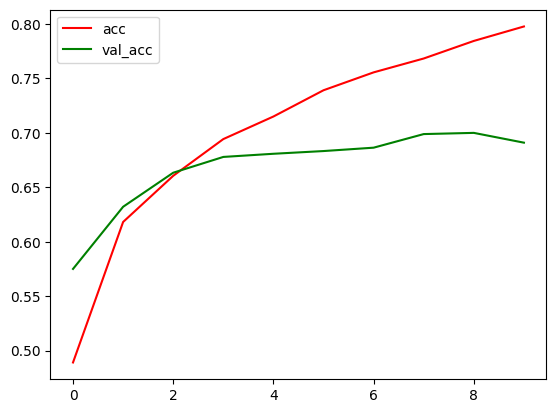

In [58]:
plt.plot(history.history['accuracy'],label='acc',color='red')
plt.plot(history.history['val_accuracy'],label='val_acc',color='green')
plt.legend()

In [59]:
y_pred=cnnmodel.predict(x_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[7.8897690e-03, 5.5474543e-04, 2.3337686e-03, 4.7597539e-01,
        4.7208075e-03, 4.8850107e-01, 4.2928564e-03, 5.0770765e-04,
        1.3753822e-02, 1.4700294e-03],
       [1.5800507e-04, 3.4559119e-02, 6.9785045e-07, 9.2378023e-06,
        9.1120813e-07, 5.1156812e-09, 3.0914713e-08, 3.1622069e-08,
        9.6393514e-01, 1.3368601e-03],
       [1.1816166e-01, 2.4779971e-01, 1.1882852e-03, 1.4594061e-02,
        4.8597557e-03, 8.6319428e-03, 3.7989728e-05, 1.0811227e-01,
        2.5081465e-01, 2.4579963e-01],
       [9.5917892e-01, 2.0039832e-04, 2.8518573e-03, 2.5547555e-04,
        4.4208616e-03, 2.3901319e-05, 6.5497920e-06, 2.6565620e-05,
        3.2843098e-02, 1.9229176e-04],
       [4.3650394e-07, 3.3724928e-06, 8.3929778e-04, 5.8108412e-02,
        1.4621359e-01, 5.9639839e-03, 7.8885913e-01, 2.4335022e-06,
        2.3525681e-06, 6.8483196e-06]], dtype=float32)

In [60]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [61]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

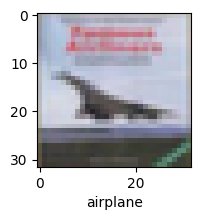

In [62]:
plot_sample(x_test,y_test,3)

In [63]:
classes[y_classes[3]]

'airplane'

In [64]:
cnnmodel.save('cnnmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
